In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

## Clean Data

In [3]:
df_movies = df[df['type']=='Movie']


In [4]:
df_movies['date_added'] = pd.to_datetime(df['date_added'])


In [5]:
df_movies['month_added'] = df_movies['date_added'].dt.month_name()


In [6]:
df_movies['year_added'] = df_movies['date_added'].dt.year
df_movies['day_added'] = df_movies['date_added'].dt.day_name()

In [7]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,Friday
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,Thursday
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,Thursday
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January,2020,Wednesday
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020,Monday


In [8]:
df_movies[df_movies.isna().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",May,2018,Wednesday
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,2016-06-30,2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,June,2016,Thursday
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,2020-02-05,2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,February,2020,Wednesday
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,2016-12-01,2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,December,2016,Thursday
52,s53,Movie,100 Days Of Solitude,NaN,NaN,Spain,2018-07-06,2018,TV-MA,93 min,"Documentaries, International Movies",Spanish photographer José Díaz spends 100 days...,July,2018,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7719,s7720,Movie,Yoo Byung Jae: Too Much Information,Yoo Byung-jae,Yoo Byung-jae,NaN,2018-03-16,2018,TV-MA,63 min,Stand-Up Comedy,"""Saturday Night Live Korea"" writer-turned-come...",March,2018,Friday
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,2020-07-10,2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin...",July,2020,Friday
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,2019-12-13,2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",December,2019,Friday
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September,2020,Friday


In [9]:
df_movies['director']=df_movies['director'].fillna('unknown')
df_movies['cast']=df_movies['cast'].fillna('unknown')
df_movies['country']=df_movies['country'].fillna('unknown')
df_movies['rating']=df_movies['rating'].fillna('unknown')
df_movies[df_movies.isna().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added


### Convert values to numeric

In [10]:
df_movies['duration'] = df_movies['duration'].apply(lambda x: x.split()[0])

df_movies['duration'] = pd.to_numeric(df_movies['duration'])
df_movies['release_year'] = pd.to_numeric(df_movies['release_year'])
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,Friday
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,Thursday
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,Thursday
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020,Wednesday
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020,Monday


### Which movie was the longest

In [11]:
print(df_movies['duration'].max())
df_movies[df_movies['duration']==312].style.background_gradient(cmap='plasma')

312


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
957,s958,Movie,Black Mirror: Bandersnatch,unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry",United States,2018-12-28 00:00:00,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.",December,2018,Friday


We see the longest movie is the Black Mirror one, if I remember correctly this movie has a lot of options the viewer can choose, so this number must be the with all the options, that's why it says the duration is 5.2 hours. 

So which is the second longest one?


In [12]:
df_movies['duration'].nlargest(3)

957     312
6850    253
4490    237
Name: duration, dtype: int64

In [13]:
df_movies[df_movies['duration'].isin([312,253,237])].style.background_gradient(cmap='plasma') 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
957,s958,Movie,Black Mirror: Bandersnatch,unknown,"Fionn Whitehead, Will Poulter, Craig Parkinson, Alice Lowe, Asim Chaudhry",United States,2018-12-28 00:00:00,2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question reality as he adapts a dark fantasy novel into a video game. A mind-bending tale with multiple endings.",December,2018,Friday
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Younes Shalabi, Nadia Shukri, Karima Mokhtar",Egypt,2020-05-21 00:00:00,1979,TV-14,237,"Comedies, Dramas, International Movies","Hoping to prevent their father from skipping town with his mistress, four rowdy siblings resort to absurd measures to stop him.",May,2020,Thursday
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Younes Shalabi, Hadi El-Gayyar, Ahmad Zaki, Hassan Moustafa",Egypt,2020-05-21 00:00:00,1973,TV-14,253,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform five notorious misfits into model students — and has unintended results.,May,2020,Thursday


The second largest movie is from Egypt, and it last for 4 hours, now lets see the mean value of the duration. 

### Average movies duration

In [14]:
df_movies['duration'].mean()

99.30797842663195

The average length of movies is 1.65 hours, so if we want to make a movie it should be around this number

## Most active month

In [15]:
df_movies['month_added'].value_counts()

January      560
December     554
October      553
November     511
March        471
April        420
September    415
August       414
July         403
June         377
May          371
February     328
Name: month_added, dtype: int64

The most active month is January it seems, the least active is the next one, which is February.

If we want to publish content I think it should be around July or August not the more active neither the most inactive months, balance is always good.


## We can vizualize this

In [16]:
net_date = df_movies[['date_added']].dropna()
net_date['year'] = net_date.date_added.dt.year
net_date['month'] = net_date.date_added.dt.month_name()
net_date.head()

,date_added,year,month
1,2016-12-23,2016,December
2,2018-12-20,2018,December
3,2017-11-16,2017,November
4,2020-01-01,2020,January
6,2020-06-01,2020,June


In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_months = net_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df_months.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,5.0,16.0,52.0,79.0,126.0,172.0,101.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,2.0,2.0,28.0,57.0,119.0,195.0,103.0,0.0
October,0.0,0.0,0.0,11.0,0.0,1.0,4.0,10.0,34.0,99.0,146.0,131.0,117.0,0.0
September,0.0,0.0,0.0,1.0,0.0,1.0,1.0,6.0,29.0,86.0,83.0,92.0,116.0,0.0
August,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0,77.0,135.0,92.0,83.0,0.0


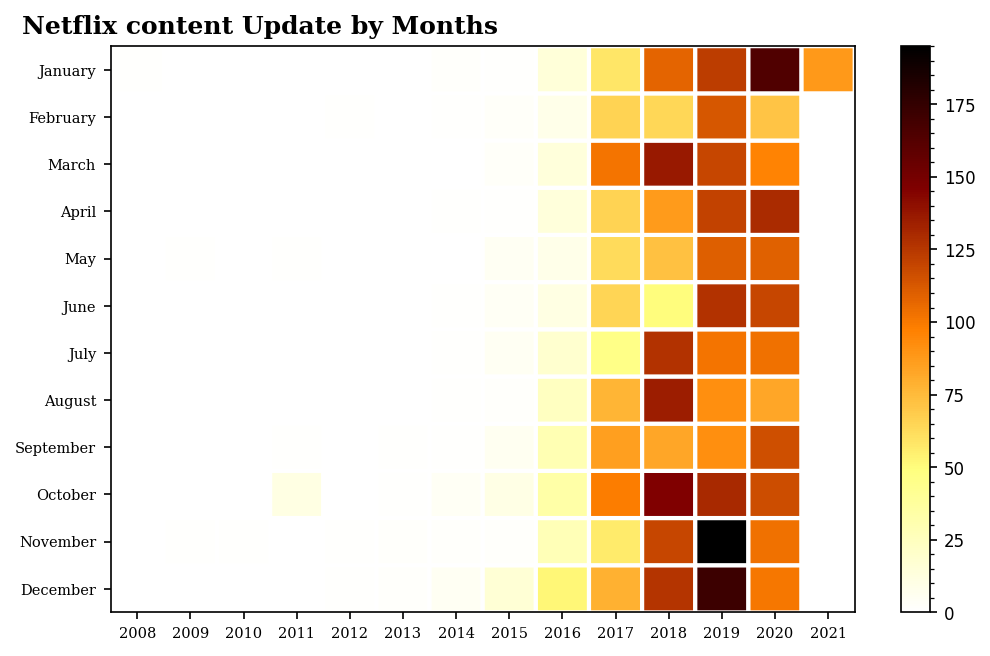

In [18]:
plt.figure(figsize=(8,5),dpi=150)
plt.pcolor(df_months, cmap='afmhot_r', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5,len(df_months.columns),1), df_months.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_months.index), 1), df_months.index, fontsize=7, fontfamily='serif')

plt.title('Netflix content Update by Months', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()


plt.show()

Overall the most active month is January.

This probably because of contracts that starts at the beginning of the year or maybe the figure out that people have more hunger for content in January. 


## How activity grew

In [19]:
import matplotlib.patheffects as path_effects
year_data = df_movies['year_added'].value_counts().sort_index().loc[:2020]
year_data.head()

2008     1
2009     2
2010     1
2011    13
2012     3
Name: year_added, dtype: int64

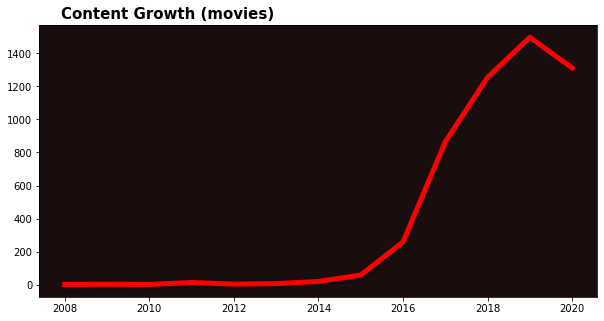

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
# total
# year_data.index() is x and y is the values of each year
ax.plot(year_data.index, year_data, color='red', linewidth=5, label='Total', 
        path_effects=[path_effects.SimpleLineShadow(), path_effects.Normal()])
ax.set_facecolor(('#1A0D0D'))
ax.set_title('Content Growth (movies)', position=(0.23, 1.0+0.03), fontsize=15,fontweight='bold')
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
plt.show()

We can see that movies added peaked in 2019, that's weird, because I would have thought that 2020 would have had more content due to the demand for content the pandemic created. 

#### But why content grew so Exponentially?

Netflix's popularity skyrocketed since around 2013, each day more users were subscribing, so they had more money to acquire the rights of movies or create their own movies. 

People loved Netflix because it has all the movies in one place, but then more and more streaming services started to show up, Netflix is not the same anymore. 


In [21]:
df_movies[df_movies['director']=='Raúl Campos, Jan Suter']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
370,s371,Movie,Alan Saldaña: Mi vida de pobre,"Raúl Campos, Jan Suter",Alan Saldaña,Mexico,2017-08-04,2017,TV-MA,54,Stand-Up Comedy,Mexican comic Alan Saldaña has fun with everyt...,August,2017,Friday
568,s569,Movie,Arango y Sanint: Ríase el show,"Raúl Campos, Jan Suter","Julián Arango, Antonio Sanint",Colombia,2018-01-17,2018,TV-MA,62,Stand-Up Comedy,Colombian stand-up comedians Antonio Sanint an...,January,2018,Wednesday
1220,s1221,Movie,Carlos Ballarta: Furia Ñera,"Raúl Campos, Jan Suter",Carlos Ballarta,Mexico,2018-05-11,2018,TV-MA,63,Stand-Up Comedy,Mexican comic Carlos Ballarta mocks himself an...,May,2018,Friday
1443,s1444,Movie,Coco y Raulito: Carrusel de ternura,"Raúl Campos, Jan Suter","Coco Celis, Raúl Meneses",Mexico,2018-07-27,2018,TV-MA,57,Stand-Up Comedy,"A study in contrasts, comedy partners and good...",July,2018,Friday
1602,s1603,Movie,Daniel Sosa: Sosafado,"Raúl Campos, Jan Suter",Daniel Sosa,Mexico,2017-02-03,2017,TV-MA,78,Stand-Up Comedy,Comedian Daniel Sosa inhabits various characte...,February,2017,Friday
2148,s2149,Movie,Fernando Sanjiao: Hombre,"Raúl Campos, Jan Suter",Fernando Sanjiao,Argentina,2018-05-25,2018,TV-MA,63,Stand-Up Comedy,Argentine actor and comedian Fernando Sanjiao ...,May,2018,Friday
3123,s3124,Movie,Jani Dueñas: Grandes fracasos de ayer y hoy,"Raúl Campos, Jan Suter",Jani Dueñas,Chile,2018-06-29,2018,TV-MA,77,Stand-Up Comedy,Chilean comedian and personality Jani Dueñas p...,June,2018,Friday
3805,s3806,Movie,Luciano Mellera: Infantiloide,"Raúl Campos, Jan Suter",Luciano Mellera,Argentina,2018-07-06,2018,TV-14,66,Stand-Up Comedy,Argentina's Luciano Mellera emphasizes the hum...,July,2018,Friday
3885,s3886,Movie,Malena Pichot: Estupidez compleja,"Raúl Campos, Jan Suter",Malena Pichot,Argentina,2018-03-02,2018,TV-MA,51,Stand-Up Comedy,An Argentine comedian espouses the values of f...,March,2018,Friday
4005,s4006,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Alexis de Anda,Mexico,2017-11-10,2017,TV-MA,54,Stand-Up Comedy,"Raw and outspoken, comedian Alexis de Anda bar...",November,2017,Friday


The directors with the most movies are spanish speakears that do stand up comedy, maybe we should look for directors on other genders

In [22]:
directors = df_movies['director'].value_counts()[:20]
directors.drop('unknown')

Raúl Campos, Jan Suter    18
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Kunle Afolayan             8
Robert Rodriguez           8
Johnnie To                 8
Lance Bangs                8
Shannon Hartman            8
Hakan Algül                8
Ryan Polito                7
McG                        7
Ozan Açıktan               7
Justin G. Dyck             7
Name: director, dtype: int64

In [23]:
df_movies[df_movies['director']=='Marcus Raboy']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
550,s551,Movie,Anthony Jeselnik: Fire in the Maternity Ward,Marcus Raboy,Anthony Jeselnik,United States,2019-04-30,2019,TV-MA,64,Stand-Up Comedy,"Forging his own comedic boundaries, Anthony Je...",April,2019,Tuesday
1543,s1544,Movie,Cristela Alonzo: Lower Classy,Marcus Raboy,Cristela Alonzo,United States,2017-01-24,2017,TV-MA,67,Stand-Up Comedy,The irrepressible Alonzo skewers Latino stereo...,January,2017,Tuesday
1585,s1586,Movie,"Dana Carvey: Straight White Male, 60",Marcus Raboy,Dana Carvey,United States,2016-11-04,2016,TV-MA,64,Stand-Up Comedy,Emmy-winning comedian Dana Carvey blends pitch...,November,2016,Friday
1705,s1706,Movie,DeRay Davis: How to Act Black,Marcus Raboy,DeRay Davis,United States,2017-11-14,2017,TV-MA,66,Stand-Up Comedy,Dynamic comic DeRay Davis hits the stage like ...,November,2017,Tuesday
3231,s3232,Movie,Judd Apatow: The Return,Marcus Raboy,Judd Apatow,United States,2017-12-12,2017,TV-MA,70,Stand-Up Comedy,Judd Apatow returns to stand-up comedy after 2...,December,2017,Tuesday
3323,s3324,Movie,Katt Williams: Kattpacalypse,Marcus Raboy,Katt Williams,United States,2018-07-03,2012,TV-MA,61,Stand-Up Comedy,Urban comic Katt Williams ushers in Kattpacaly...,July,2018,Tuesday
3828,s3829,Movie,Lynne Koplitz: Hormonal Beast,Marcus Raboy,Lynne Koplitz,United States,2017-08-22,2017,TV-MA,51,Stand-Up Comedy,Unabashed comedian Lynne Koplitz offers a woma...,August,2017,Tuesday
3945,s3946,Movie,Marlon Wayans: Woke-ish,Marcus Raboy,Marlon Wayans,United States,2018-02-27,2018,TV-MA,67,Stand-Up Comedy,"Rollicking, outrageous and audacious, Marlon W...",February,2018,Tuesday
4124,s4125,Movie,Miranda Sings Live…Your Welcome,Marcus Raboy,Colleen Ballinger,United States,2019-06-04,2019,TV-14,62,Stand-Up Comedy,Viral video star Miranda Sings and her real-wo...,June,2019,Tuesday
5319,s5320,Movie,Ryan Hamilton: Happy Face,Marcus Raboy,Ryan Hamilton,United States,2017-08-29,2017,TV-14,57,Stand-Up Comedy,Small-town import Ryan Hamilton charms New Yor...,August,2017,Tuesday


Seems like stand-up comedy is a constant, after that comes Martin Scorsese, who is a great director

In [24]:
df_movies[df_movies['director']=='Martin Scorsese']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added
392,s393,Movie,Alice Doesn't Live Here Anymore,Martin Scorsese,"Ellen Burstyn, Kris Kristofferson, Billy Green...",United States,2019-07-01,1974,PG,112,"Classic Movies, Comedies, Dramas",A widowed singer and single mother starts over...,July,2019,Monday
2351,s2352,Movie,Gangs of New York,Martin Scorsese,"Leonardo DiCaprio, Daniel Day-Lewis, Cameron D...","United States, Italy",2019-08-20,2002,R,167,Dramas,In the crime-ridden slums of New York in the 1...,August,2019,Tuesday
2493,s2494,Movie,GoodFellas,Martin Scorsese,"Robert De Niro, Ray Liotta, Joe Pesci, Lorrain...",United States,2021-01-01,1990,R,145,"Classic Movies, Dramas",Former mobster Henry Hill recounts his colorfu...,January,2021,Friday
2857,s2858,Movie,Hugo,Martin Scorsese,"Ben Kingsley, Sacha Baron Cohen, Asa Butterfie...","United Kingdom, United States, France",2020-03-01,2011,PG,127,"Children & Family Movies, Dramas","Living inside a Paris train station, an orphan...",March,2020,Sunday
4008,s4009,Movie,Mean Streets,Martin Scorsese,"Robert De Niro, Harvey Keitel, David Proval, A...",United States,2019-07-01,1973,R,112,"Classic Movies, Dramas, Independent Movies","In New York's Little Italy, a low-level hoodlu...",July,2019,Monday
4484,s4485,Movie,No Direction Home: Bob Dylan,Martin Scorsese,"Bob Dylan, Joan Baez, Dave Van Ronk, Peter Yar...","United Kingdom, United States, Japan",2020-04-25,2005,TV-MA,208,"Documentaries, Music & Musicals",Featuring rare concert footage and interviews ...,April,2020,Saturday
5063,s5064,Movie,Raging Bull,Martin Scorsese,"Robert De Niro, Cathy Moriarty, Joe Pesci, Fra...",United States,2019-10-01,1980,R,129,"Classic Movies, Dramas, Sports Movies",This gritty biopic of brutal boxer Jake LaMott...,October,2019,Tuesday
5260,s5261,Movie,Rolling Thunder Revue: A Bob Dylan Story by Ma...,Martin Scorsese,"Bob Dylan, Allen Ginsberg, Joan Baez, Patti Sm...",United States,2019-06-12,2019,TV-MA,142,"Documentaries, Music & Musicals","In an alchemic mix of fact and fantasy, Martin...",June,2019,Wednesday
5994,s5995,Movie,Taxi Driver,Martin Scorsese,"Robert De Niro, Jodie Foster, Cybill Shepherd,...",United States,2020-04-01,1976,R,114,"Classic Movies, Dramas, Thrillers",Enraged by New York's moral rot and urban deca...,April,2020,Wednesday
6288,s6289,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong",2021-01-01,2006,R,151,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,January,2021,Friday


In [25]:
import sys
!{sys.executable} -m pip install countrygroups

ERROR: Could not find a version that satisfies the requirement countrygroups
ERROR: No matching distribution found for countrygroups


In [26]:

europe = ['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']
europe

['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']

In [27]:
def get_europe(country):
    europe = ['Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden']
    if country in europe:
        return 'europe'

In [28]:
df_movies['continent'] = df_movies['country'].apply(lambda x: get_europe(x))
df_movies.head()
                

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added,continent
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December,2016,Friday,None
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December,2018,Thursday,None
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November,2017,Thursday,None
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,January,2020,Wednesday,None
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",June,2020,Monday,None


In [29]:
europe = df_movies[df_movies['continent']=='europe']

In [30]:
europe['country'].value_counts().reset_index().style.background_gradient(cmap='plasma') 

,index,country
0,Spain,89
1,France,69
2,Germany,42
3,Italy,28
4,Poland,15
5,Netherlands,12
6,Ireland,7
7,Romania,6
8,Denmark,5
9,Hungary,4


Spain has the most movies on netflix from europe

## IMDb Ratings

In [31]:
imdb_movies = pd.read_csv('../input/imdb-extensive-dataset/IMDb movies.csv', usecols=['title','budget','genre'])
imdb_ratings=pd.read_csv('../input/imdb-extensive-dataset/IMDb ratings.csv', usecols=['weighted_average_vote'])
ratings = pd.DataFrame({'Title':imdb_movies.title,
                       'Rating':imdb_ratings.weighted_average_vote,
                       'Budget':imdb_movies.budget,
                       'Genre':imdb_movies.genre})
ratings.drop_duplicates(subset=['Title','Rating', 'Budget'], inplace=True)

In [32]:
joint = ratings.merge(df_movies,left_on='Title', right_on='title', how='inner')
joint = joint.sort_values(by='Rating', ascending=False)
joint.head()

,Title,Rating,Budget,Genre,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,day_added,continent
269,Schindler's List,8.9,$ 22000000,"Biography, Drama, History",s5431,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,April,2018,Sunday,None
279,Pulp Fiction,8.9,$ 8000000,"Crime, Drama",s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01,1994,R,154,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,January,2019,Tuesday,None
1027,Inception,8.8,$ 160000000,"Action, Adventure, Sci-Fi",s2980,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom",2020-01-01,2010,PG-13,148,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru...",January,2020,Wednesday,None
1367,Much Ado About Nothing,8.6,NaN,"Comedy, Romance",s4266,Movie,Much Ado About Nothing,Alejandro Fernández Almendras,"Agustín Silva, Paulina García, Daniel Alcaíno,...","Chile, United States, France",2016-10-01,2016,TV-MA,96,"Dramas, Independent Movies, International Movies",Carefree college student Vicente ends up in a ...,October,2016,Saturday,None
445,Koshish,8.6,NaN,Drama,s3443,Movie,Koshish,Gulzar,"Sanjeev Kumar, Jaya Bhaduri, Asrani, Seema, Om...",India,2019-12-31,1972,TV-14,115,"International Movies, Romantic Movies",A speech and hearing-impaired couple persists ...,December,2019,Tuesday,None


In [33]:
import plotly.express as px
top_rated=joint[0:10]
fig = px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

The best rated movie seems to be Pulp Fiction which is a really great Movie, the suprising thing is there is a lot of indian good movies it really shows the growth of bolliwood